In [1]:
# importando as bibliotecas utilizadas nos projetos
import pandas as pd

# bibliotecas gráficas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
df = pd.read_csv('./T1.csv')
df.head(3)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [19]:
# Renomeação das colunas para melhor assimilação
df.columns = ['Data/hora', ' Active Power(Kw)', 'WindSpeed(m/s)', 'Curvateórica(Kwh)', 'Direção do Vento(º)']
del df['Direção do Vento(º)']
df['Data/hora'] = pd.to_datetime(df['Data/hora'])
display(df)

,Data/hora,Active Power(Kw),WindSpeed(m/s),Curvateórica(Kwh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


In [20]:
df['Data/hora'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50530 entries, 0 to 50529
Series name: Data/hora
Non-Null Count  Dtype         
--------------  -----         
50530 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 394.9 KB


### Plotando os graficos
se não existisse algum problema a curva iria ser exatamente a teorica

c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

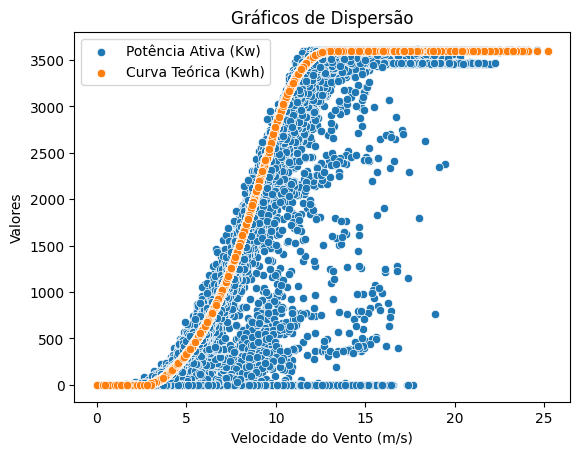

In [29]:
grafico_dispersao = sns.scatterplot(data = df, x=df['WindSpeed(m/s)'],y=df[' Active Power(Kw)'])
grafico_curvateorica = sns.scatterplot(data = df, x=df['WindSpeed(m/s)'],y=df['Curvateórica(Kwh)'])

# Adicionar legenda aos gráficos
plt.legend(labels=['Potência Ativa (Kw)', 'Curva Teórica (Kwh)'],loc='upper left')  # Você pode ajustar a posição da legenda conforme necessário

# Definir rótulos dos eixos e título
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Valores')
plt.title('Gráficos de Dispersão')
plt.show()

In [41]:
## 5% pra cima e 5% pra baixo de consideiração (limites aceitaveis)
pot_real = df[' Active Power(Kw)'].to_list()
pot_teorica = df['Curvateórica(Kwh)'].to_list()
pot_max = []
pot_min = []
dentro_limite = []
for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

#print(len(pot_max), len(pot_min), len(pot_teorica))
for p, potencia in enumerate(pot_real):
    if potencia >= pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia==0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

print(dentro_limite.count('Dentro')/len(dentro_limite))


0.37286760340391845


In [42]:
df['DentroLimite'] = dentro_limite
df.head()

,Data/hora,Active Power(Kw),WindSpeed(m/s),Curvateórica(Kwh),Hora,Desvio Padrão,DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,0,4.227166,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,0,4.227166,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,0,4.227166,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,0,4.227166,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,0,4.227166,Fora


c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='WindSpeed(m/s)', ylabel=' Active Power(Kw)'>

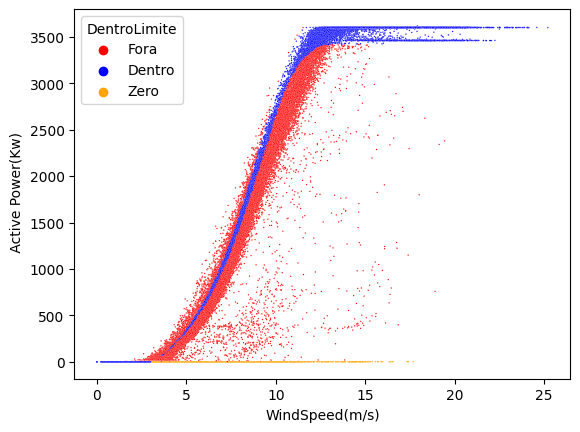

In [43]:
cores = {
    'Dentro': 'blue',
    'Fora': 'red',
    'Zero': 'orange'
}
sns.scatterplot(data=df,x=df['WindSpeed(m/s)'],y=df[' Active Power(Kw)'],hue=df['DentroLimite'],s=1,palette=cores)